In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

# remove warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the data
myd = pd.read_csv("StressLevelDataset.csv")

# Display the first 5 rows of the data
myd.head()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1


In [3]:
myd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   anxiety_level                 1100 non-null   int64
 1   self_esteem                   1100 non-null   int64
 2   mental_health_history         1100 non-null   int64
 3   depression                    1100 non-null   int64
 4   headache                      1100 non-null   int64
 5   blood_pressure                1100 non-null   int64
 6   sleep_quality                 1100 non-null   int64
 7   breathing_problem             1100 non-null   int64
 8   noise_level                   1100 non-null   int64
 9   living_conditions             1100 non-null   int64
 10  safety                        1100 non-null   int64
 11  basic_needs                   1100 non-null   int64
 12  academic_performance          1100 non-null   int64
 13  study_load                    110

# Exploratory Analysis

### Examining the data for distribution and ranges of likert scale variables.

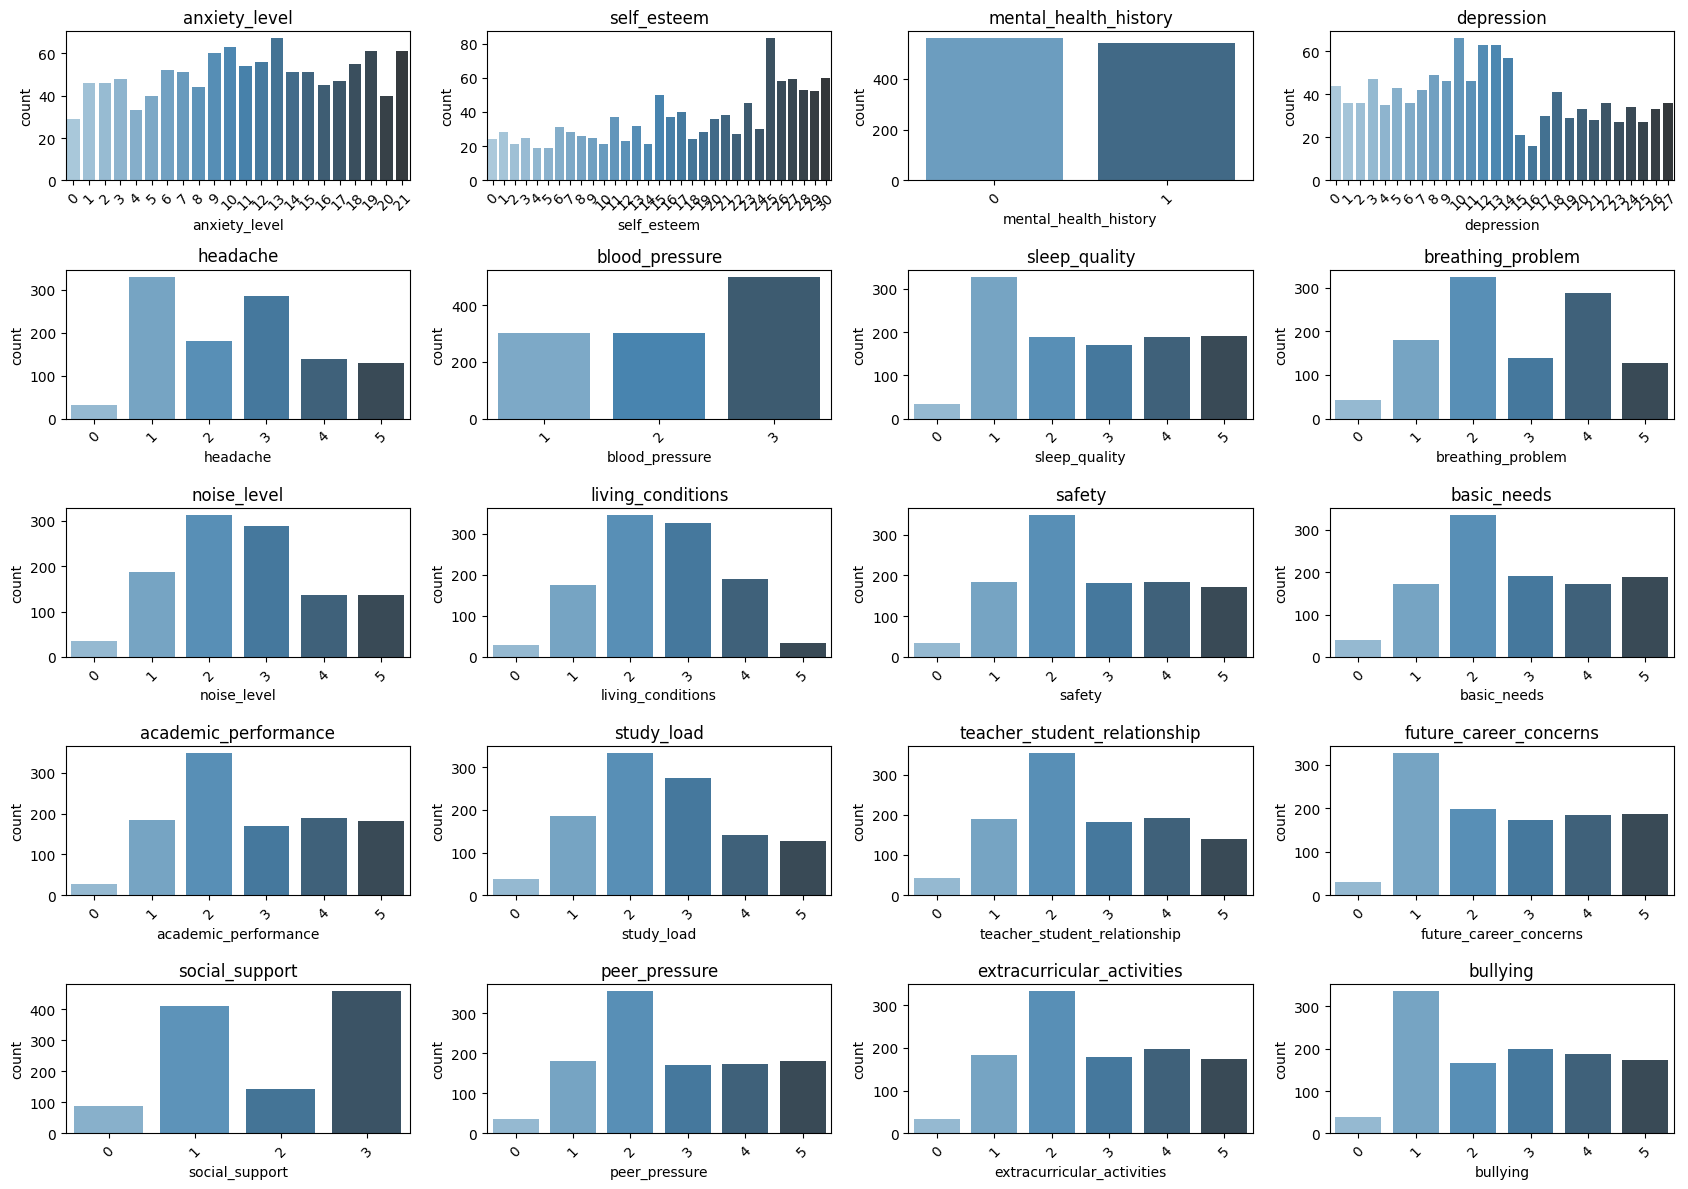

In [4]:
# Bar charts for all columns
plt.figure(figsize=(17, 12)) 

# Exclude the last column
columns_to_plot = myd.columns[:-1]

for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(5, 4, i)
    sns.countplot(x=column, data=myd, palette='Blues_d')
    plt.xticks(rotation=45)
    plt.title(column)

plt.tight_layout()
plt.show()

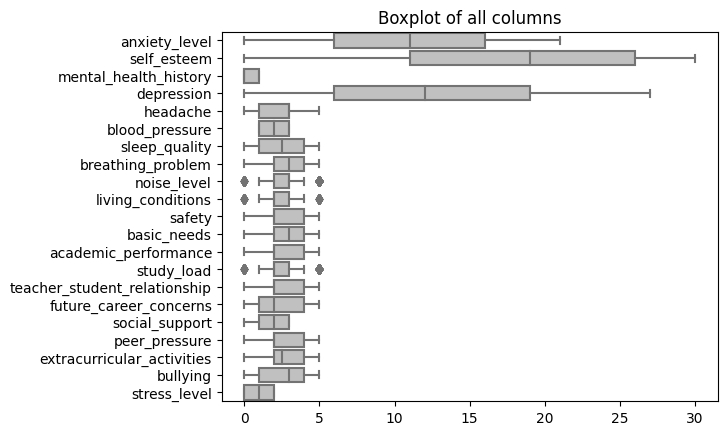

In [5]:
# Box plots for all columns
sns.boxplot(data=myd, orient='h', color='silver')
plt.title('Boxplot of all columns')
plt.show()

- Most variables are ona scale of 1-5
- Anxiety, self esteem, depressioon have larger range so keep in mind for furthur EDA
- Mental helath history binary
- Blood pressure scale 1-3
- Target variable stress level is on a scale 1-3

In [6]:
# Percentage of students with mental health history
mental_health_history = myd['mental_health_history'].value_counts(normalize=True) * 100
print('Percentage of students with mental health history:', mental_health_history[1])

Percentage of students with mental health history: 49.27272727272727


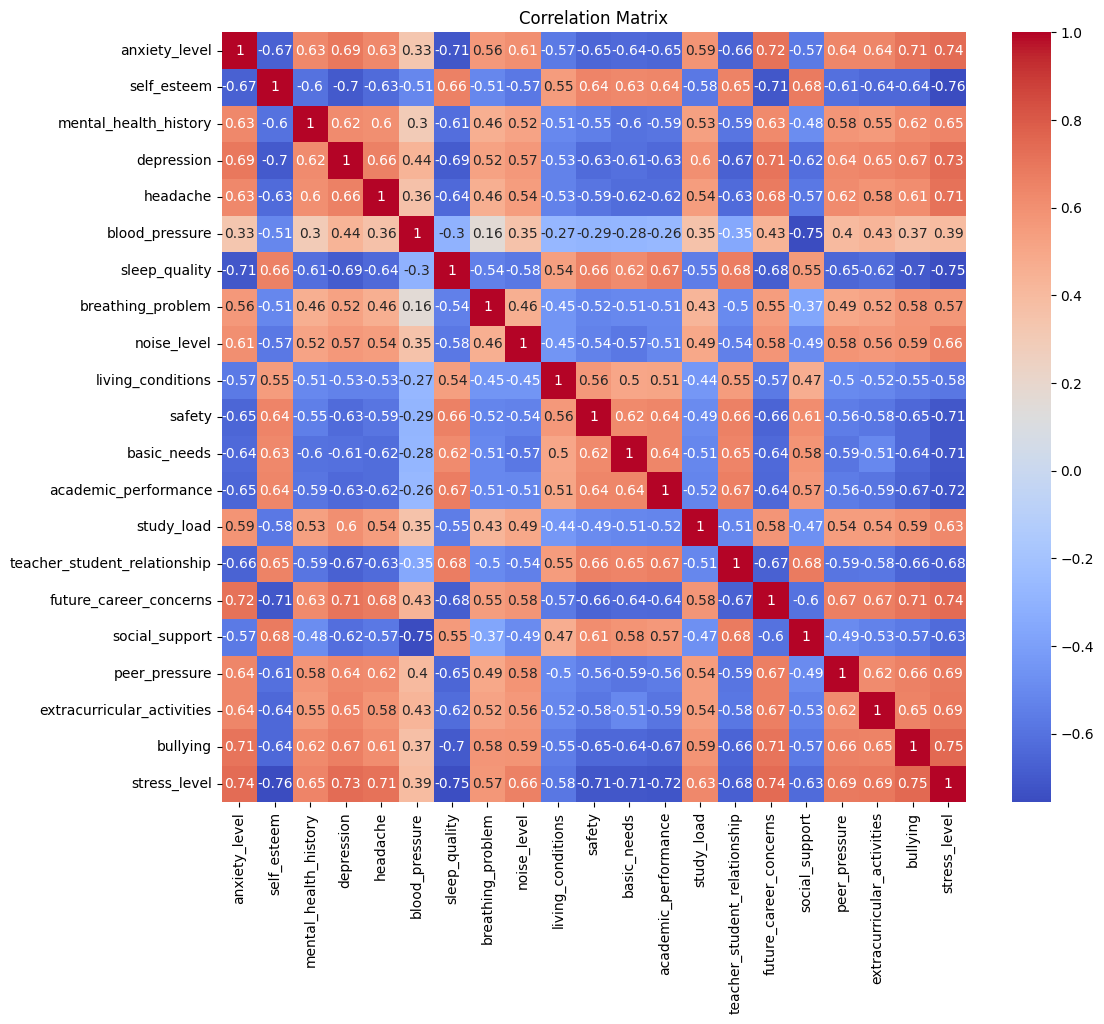

In [7]:
# Correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(myd.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Target variable analysis

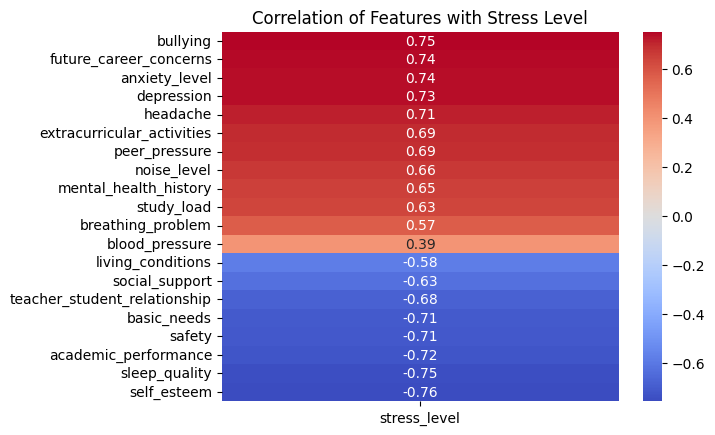

In [8]:
# Correlation heat map only stress level 
correlation = myd.corr()
correlation_stress = correlation['stress_level'].sort_values(ascending=False)
correlation_stress = correlation_stress.drop('stress_level')

sns.heatmap(correlation_stress.to_frame(), annot=True, cmap='coolwarm')
plt.title('Correlation of Features with Stress Level')
plt.show()

In [9]:
# Average score for each stress level
average_stress = myd.groupby('stress_level').mean()
average_stress

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,safety,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying
stress_level,,,,,,,,,,,,,,,,,,,,
0,5.431635,25.252011,0.101877,6.013405,1.313673,2.195710,4.126005,1.697051,1.648794,3.313673,4.099196,4.144772,4.142091,1.654155,3.927614,1.335121,2.541555,1.675603,1.715818,1.254692
1,11.430168,19.262570,0.488827,11.874302,2.460894,1.324022,2.530726,2.927374,2.511173,2.502793,2.416201,2.477654,2.491620,2.533520,2.357542,2.522346,2.178771,2.458101,2.480447,2.555866
2,16.401084,8.780488,0.891599,19.829268,3.761518,3.000000,1.303523,3.653117,3.794038,1.728997,1.672087,1.672087,1.661247,3.685637,1.636856,4.100271,0.926829,4.073171,4.108401,4.054201


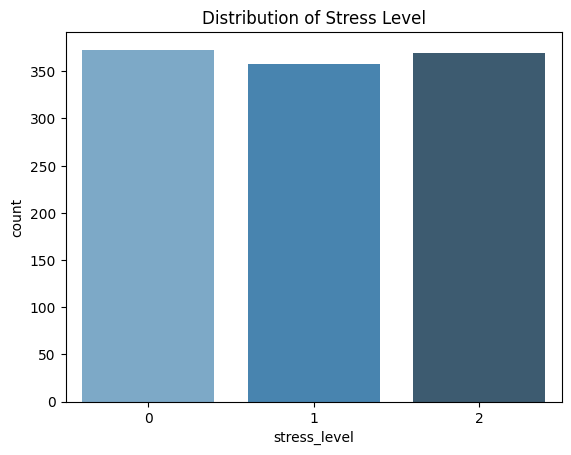

In [10]:
# Distribution of target variable
sns.countplot(x='stress_level', data=myd, palette='Blues_d')
plt.title('Distribution of Stress Level')
plt.show()

- Target variable stress_level is balanced so dont need to modify dataset.

In [11]:
# Split the data into features and target
X = myd.drop('stress_level', axis=1)
y = myd['stress_level']

### Feature Scaling for PCA

In [12]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA

Using more so for latent variable discovery as compared to dimensionality reduction.


### Assessing suitability of the data for PCA and factor analysis

In [13]:
# KMO Test
#from factor_analyzer.factor_analyzer import calculate_kmo
#kmo_all, kmo_model = calculate_kmo(X_scaled)

#print(kmo_all)
#print(kmo_model)

In [14]:
# Bartlett's Test 
#from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
#chi_square_value, p_value = calculate_bartlett_sphericity(X_scaled)

#print("Chi-square value:", chi_square_value)
#print("p-value:", p_value)

### How many components to use?

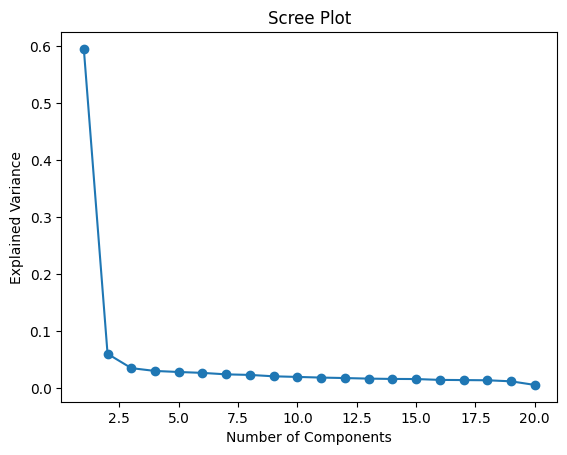

In [15]:
# PCA

# Scree plot
pca = PCA()
pca.fit(X_scaled)

plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
plt.title('Scree Plot')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.show()

- 2 componets capture most of the explained variance

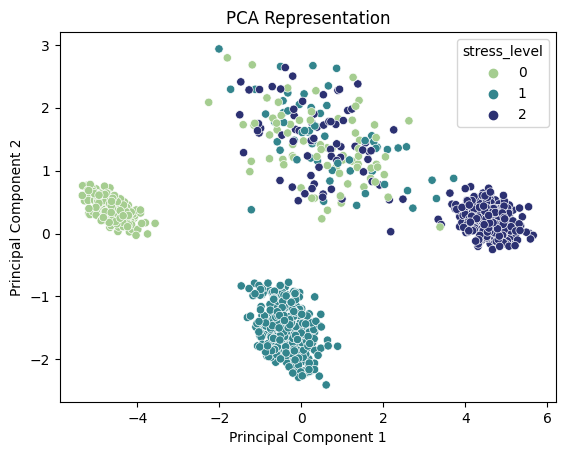

In [16]:
# Fit PCA with 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot PCA representation
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='crest') #cividis
plt.title('PCA Representation')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [17]:
# Explained Variance Ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)

# Total variance explained
total_variance_explained = np.sum(explained_variance_ratio)
print("Total Variance Explained:", total_variance_explained)

Explained Variance Ratio: [0.59556883 0.05980715]
Total Variance Explained: 0.6553759810004768


In [18]:
# Access loading coefficients for all variables
loadings = pca.components_

# DataFrame to display loadings
loadings_df = pd.DataFrame(loadings.T, columns=['PC1', 'PC2'], index=X.columns)

print("Loadings for all variables in relation to Principal Components:")
print(loadings_df)

Loadings for all variables in relation to Principal Components:
                                   PC1       PC2
anxiety_level                 0.244210 -0.111345
self_esteem                  -0.242044 -0.150479
mental_health_history         0.218941 -0.117725
depression                    0.242709  0.043427
headache                      0.229389 -0.013024
blood_pressure                0.145111  0.744156
sleep_quality                -0.240323  0.135574
breathing_problem             0.189994 -0.299836
noise_level                   0.208863 -0.015800
living_conditions            -0.198625  0.095565
safety                       -0.229310  0.084540
basic_needs                  -0.226792  0.106121
academic_performance         -0.229500  0.136101
study_load                    0.204304  0.004505
teacher_student_relationship -0.236666 -0.000604
future_career_concerns        0.247480  0.008239
social_support               -0.217857 -0.480506
peer_pressure                 0.226360 -0.025406
extra

In [19]:
# Correlation Loadings between original variables and principal components
correlation_loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
correlation_loadings_df = pd.DataFrame(correlation_loadings, columns=['PC1', 'PC2'], index=X.columns)

# cutoff threshold for correlation loadings
cutoff = 0.5  

# Filtering the data frame to only include values above cutoff
significant_correlation_loadings_df = correlation_loadings_df.where(
    lambda x: abs(x) > cutoff).dropna(how='all').fillna('')

print("Significant Correlation Loadings for all variables in relation to Principal Components:")
print(significant_correlation_loadings_df)

Significant Correlation Loadings for all variables in relation to Principal Components:
                                   PC1       PC2
anxiety_level                 0.843223          
self_esteem                  -0.835742          
mental_health_history         0.755971          
depression                    0.838038          
headache                      0.792047          
blood_pressure                0.501046  0.814241
sleep_quality                -0.829801          
breathing_problem             0.656022          
noise_level                   0.721175          
living_conditions            -0.685823          
safety                       -0.791775          
basic_needs                  -0.783082          
academic_performance         -0.792432          
study_load                    0.705434          
teacher_student_relationship -0.817175          
future_career_concerns        0.854514          
social_support               -0.752228 -0.525761
peer_pressure                 

In [20]:
# FA
# from factor_analyzer import FactorAnalyzer

# # Create factor analysis object and perform factor analysis
# fa = FactorAnalyzer(rotation='varimax', n_factors=2)
# fa.fit(X_scaled)

# # Get the factor loadings
# loadings = fa.loadings_

# # Create a DataFrame to display loadings
# loadings_df = pd.DataFrame(loadings, columns=['Factor 1', 'Factor 2'], index=X.columns)

# # cutoff threshold for correlations
# cutoff = 0.5

# # Filter the DataFrame to only include values above or below the cutoff
# significant_loadings_df = loadings_df.where(
#     lambda x: abs(x) > cutoff).dropna(how='all').fillna('')
# print("Significant Loadings for all variables in relation to Factors:")
# print(significant_loadings_df)

- Focused on using PCA more so for latent variable discovery as compared to dimensionality reduction.
    - So can accept lower cumalative explained variance.
    - Will focus on examinig the correlation loadings more so than the variance.
- PCA with two components determined by elbow only led to 65% explained variance.
- Most variables had the highest correlation with the first PC except blood pressure that had the highest correlation with PC2.
- FA gave simialr results except the second factor also had a higher correlation with social support and not only blood pressure

# Cluster Analysis

### How many clusters to use? 
Will use these methods as starting points and experiment to see if get better results with a different number of clusters

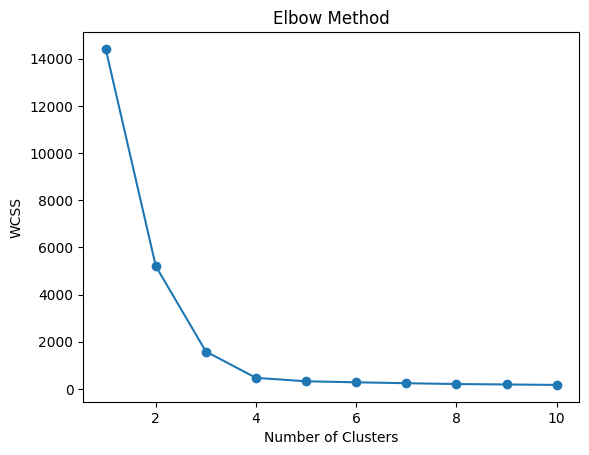

In [21]:
# Determine the optimal number of clusters using the elbow method
wcss = []
max_clusters = 10
for i in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

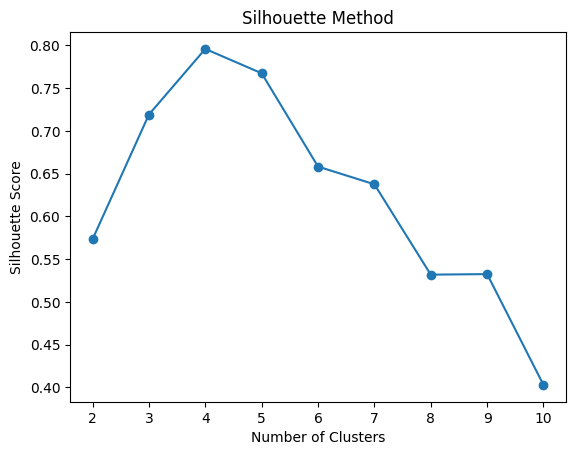

Optimal number of clusters: 4


In [22]:
# Initialize a list to store silhouette scores for different numbers of clusters
silhouette_scores = []

# Specify the range of clusters to try
max_clusters = 10
for n_clusters in range(2, max_clusters + 1):
    # Initialize KMeans with n_clusters
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X_pca)
    
    # Compute silhouette score
    silhouette_avg = silhouette_score(X_pca, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot silhouette scores
plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o', linestyle='-')
plt.title('Silhouette Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

# Find the optimal number of clusters
optimal_num_clusters = np.argmax(silhouette_scores) + 2  # Adding 2 because we started from 2 clusters
print("Optimal number of clusters:", optimal_num_clusters)

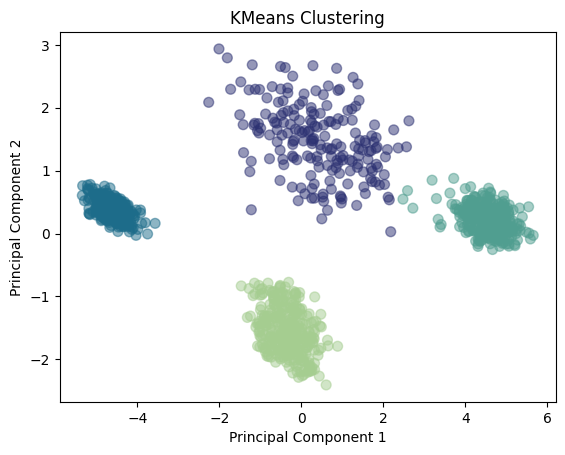

In [23]:
# KMeans clustering
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans.fit(X_pca)
cluster_labels = kmeans.labels_

# Add cluster labels to the new DataFrame
clustered_data = myd.copy()
clustered_data['cluster'] = cluster_labels


# Visualize the clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='crest', s=50, alpha=0.5)
plt.title('KMeans Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [24]:
# Examine the clusters means
clustered_data.groupby('cluster').mean()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
cluster,,,,,,,,,,,,,,,,,,,,,
0,11.410000,19.980000,0.513333,11.640000,2.483333,1.0,2.456667,3.026667,2.523333,2.483333,...,2.513333,2.473333,2.486667,2.483333,2.460000,2.526667,2.466667,2.483333,2.560000,1.000000
1,17.948052,7.899351,0.996753,21.305195,3.935065,3.0,0.996753,3.951299,4.009740,1.525974,...,1.522727,1.500000,3.957792,1.470779,4.470779,0.987013,4.490260,4.422078,4.431818,1.977273
2,4.190000,27.430000,0.000000,4.096667,1.000000,2.0,4.486667,1.513333,1.470000,3.526667,...,4.520000,4.506667,1.490000,4.466667,1.000000,3.000000,1.523333,1.490000,1.000000,0.000000
3,10.218750,15.098958,0.421875,13.166667,2.614583,3.0,2.791667,2.343750,2.505208,2.588542,...,2.453125,2.572917,2.458333,1.953125,2.598958,0.562500,2.229167,2.552083,2.322917,0.973958


In [25]:
# cluster size
cluster_sizes = clustered_data['cluster'].value_counts()
cluster_sizes

cluster
1    308
0    300
2    300
3    192
Name: count, dtype: int64

In [26]:
#  cluster distribution
pd.crosstab(clustered_data['cluster'], clustered_data['stress_level'], normalize='index')

stress_level,0,1,2
cluster,,,
0,0.000000,1.000000,0.000000
1,0.003247,0.016234,0.980519
2,1.000000,0.000000,0.000000
3,0.375000,0.276042,0.348958


- Cluster 1 has the highest average stress level and worst averages for most varaibles.
- Cluster 2 on the other hand has an average of 0 stress level and contains those with positive average scores for most variables, notably an average of 4.5/5 for sleep quality, basic needs and academic performance as well as no prior mental health issues.

# Prediction Models

- Accuracy will be the prioritized metric for model selection. The classes are balanced so accuracy can be a good overall measure.
- Also paying close attention to scores for Class 2 which represents the highest strees level.

In [27]:
# Already split features (X) and target (y) when standardizing for PCA

# Split data into tranining and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Decision Tree

In [28]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [29]:
y_pred = dt.predict(X_train)

In [30]:
# Classification report
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       297
           1       1.00      1.00      1.00       285
           2       1.00      1.00      1.00       298

    accuracy                           1.00       880
   macro avg       1.00      1.00      1.00       880
weighted avg       1.00      1.00      1.00       880



In [31]:
# Cross validation
cv_scores = cross_val_score(dt, X_train, y_train, cv=10)
print("Cross Validation Scores:", cv_scores)
print("Mean Cross Validation Score:", np.mean(cv_scores))

Cross Validation Scores: [0.93181818 0.88636364 0.88636364 0.81818182 0.875      0.89772727
 0.89772727 0.875      0.89772727 0.85227273]
Mean Cross Validation Score: 0.8818181818181818


- The training accuracy was perfect with a notciable drop in the cross validaiton accuracy possibly indicating overfitting.

### Random Forest

In [32]:
# Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [33]:
y_pred = rf.predict(X_train)

In [34]:
# Classification report
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       297
           1       1.00      1.00      1.00       285
           2       1.00      1.00      1.00       298

    accuracy                           1.00       880
   macro avg       1.00      1.00      1.00       880
weighted avg       1.00      1.00      1.00       880



In [35]:
# Cross validation
cv_scores = cross_val_score(rf, X_train, y_train, cv=10)
print("Cross Validation Scores:", cv_scores)
print("Mean Cross Validation Score:", np.mean(cv_scores))

Cross Validation Scores: [0.94318182 0.875      0.86363636 0.82954545 0.90909091 0.89772727
 0.875      0.82954545 0.875      0.80681818]
Mean Cross Validation Score: 0.8704545454545455


- Again, as with the Decision Tree, the training accuracy was perfect with a notciable drop in the mean cross validaiton accuracy possibly indicaitng overfitting.

### SVM

In [36]:
# Initialize the model
svm = SVC(random_state=42)

# Fit the model
svm.fit(X_train, y_train)

SVC(random_state=42)

In [37]:
# Predict on the training set
y_pred = svm.predict(X_train)

# Classification report
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.88      0.90       297
           1       0.91      0.90      0.90       285
           2       0.86      0.92      0.89       298

    accuracy                           0.90       880
   macro avg       0.90      0.90      0.90       880
weighted avg       0.90      0.90      0.90       880



In [38]:
# Cross validation
cv_scores = cross_val_score(svm, X_train, y_train, cv=10)
print("Cross Validation Scores:", cv_scores)
print("Mean Cross Validation Score:", np.mean(cv_scores))

Cross Validation Scores: [0.95454545 0.84090909 0.89772727 0.85227273 0.86363636 0.90909091
 0.89772727 0.85227273 0.88636364 0.85227273]
Mean Cross Validation Score: 0.8806818181818181


In [39]:
# Confusion matrix
cm = confusion_matrix(y_train, y_pred)
print('Confusion Matrix:')
print(cm)

Confusion Matrix:
[[260  12  25]
 [  8 257  20]
 [ 10  14 274]]


### Gradient Boosting Classifier

In [40]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the model
gbc = GradientBoostingClassifier(random_state=42)

# Fit the model
gbc.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [41]:
# Predict on the training set
y_pred = gbc.predict(X_train)

# Classification report
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       297
           1       1.00      1.00      1.00       285
           2       1.00      1.00      1.00       298

    accuracy                           1.00       880
   macro avg       1.00      1.00      1.00       880
weighted avg       1.00      1.00      1.00       880



In [42]:
# Cross validation
cv_scores = cross_val_score(gbc, X_train, y_train, cv=10)
print("Cross Validation Scores:", cv_scores)
print("Mean Cross Validation Score:", np.mean(cv_scores))

Cross Validation Scores: [0.92045455 0.88636364 0.875      0.86363636 0.88636364 0.89772727
 0.89772727 0.84090909 0.88636364 0.81818182]
Mean Cross Validation Score: 0.8772727272727273


- Again, as with the Decision Tree and Random Forest, the training accuracy was perfect with a notciable drop in the mean cross validaiton accuracy likely indicaitng overfitting.

### Hyperparameter Tuning

The SVM model has lower training scores but high cross validation scores compared to the other models indicating it may be generalizing better. As such, it will be the main candidate to proceed with hyperparamter tuning to hopefully improve the model furthur. Hyperparamter tuning will also be performed on the Random Forest model and Gradient Boosting model to see if can correct overfitting.

In [43]:
svm = SVC(random_state=42)

# SVM Hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear', 'rbf', 'poly'],
    'degree': [2, 3, 4, 5]
}

# verbose set to 0 for easier notebook viewing
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, n_jobs=-1, verbose=0)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'degree': [2, 3, 4, 5],
                         'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['linear', 'rbf', 'poly']})

In [44]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'C': 100, 'degree': 4, 'gamma': 0.001, 'kernel': 'poly'}
0.8920454545454547


In [45]:
# Best model
best_svm = grid_search.best_estimator_

# Predict on the test set
y_pred = best_svm.predict(X_test)

# Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.88      0.89        76
           1       0.88      0.90      0.89        73
           2       0.89      0.89      0.89        71

    accuracy                           0.89       220
   macro avg       0.89      0.89      0.89       220
weighted avg       0.89      0.89      0.89       220



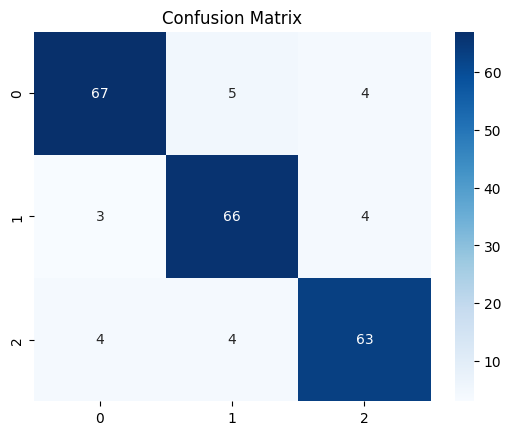

In [46]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [47]:
rf = RandomForestClassifier(random_state=42)

# Random Forest Hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# verbose set to 0 for easier notebook viewing
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=0)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [48]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'max_depth': None, 'min_samples_split': 10, 'n_estimators': 300}
0.8886363636363637


In [49]:
# Best model
best_rf = grid_search.best_estimator_

y_pred = best_rf.predict(X_test)

# Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.89      0.86        76
           1       0.93      0.86      0.89        73
           2       0.90      0.87      0.89        71

    accuracy                           0.88       220
   macro avg       0.88      0.88      0.88       220
weighted avg       0.88      0.88      0.88       220



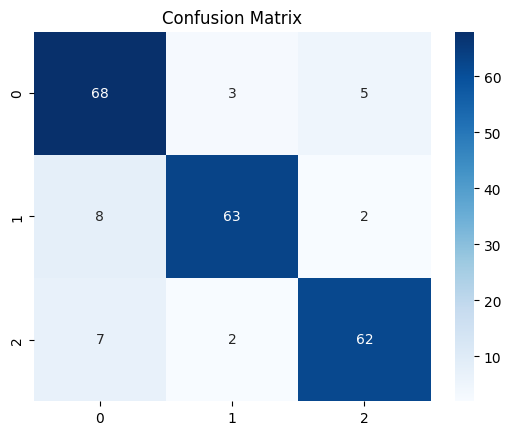

In [50]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

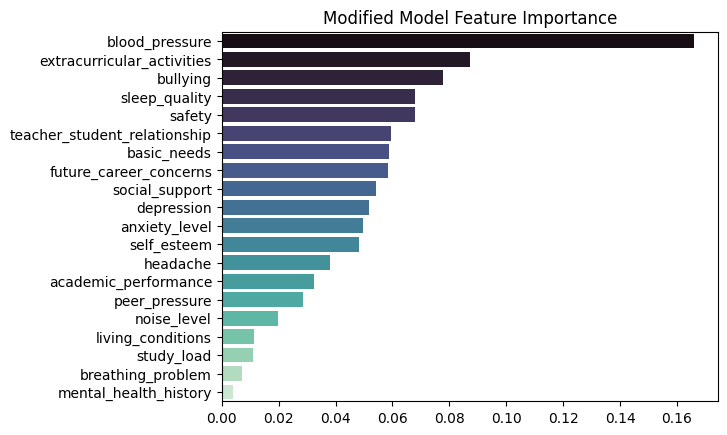

In [51]:
# Feature Importance plot
feature_importances = best_rf.feature_importances_
indices = np.argsort(feature_importances)[::-1]

sns.barplot(x=feature_importances[indices], y=X.columns[indices], palette='mako')
plt.title('Modified Model Feature Importance')
plt.show()

In [52]:
# Gradient Boosting Hyperparameter tuning
gbc = GradientBoostingClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10]
}

# verbose set to 0 for easier notebook viewing
grid_search = GridSearchCV(estimator=gbc, param_grid=param_grid, cv=5, n_jobs=-1, verbose=0)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [53]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 100}
0.890909090909091


In [54]:
# Best model
best_gbc = grid_search.best_estimator_

y_pred = best_gbc.predict(X_test)

# Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87        76
           1       0.84      0.86      0.85        73
           2       0.93      0.90      0.91        71

    accuracy                           0.88       220
   macro avg       0.88      0.88      0.88       220
weighted avg       0.88      0.88      0.88       220



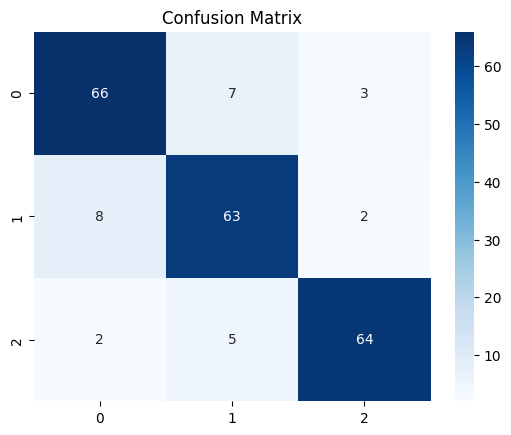

In [55]:
# confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

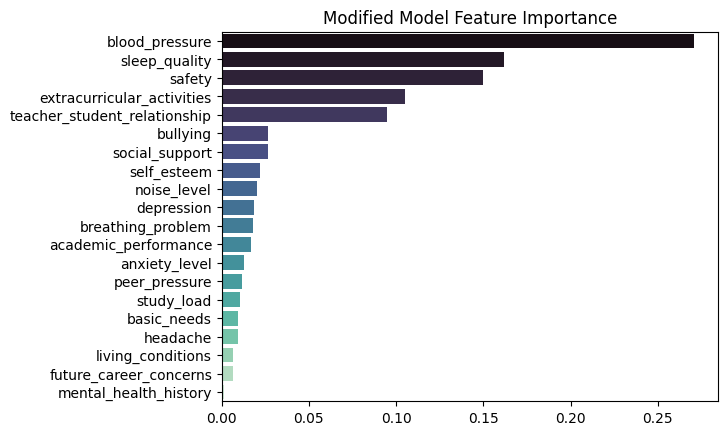

In [56]:
# Feature Importance plot
feature_importances = best_gbc.feature_importances_
indices = np.argsort(feature_importances)[::-1]

sns.barplot(x=feature_importances[indices], y=X.columns[indices], palette='mako')
plt.title('Modified Model Feature Importance')
plt.show()

After hyperparamter tuning, the SVM model appeared perform the best with an accuracy of .89 and good balance across all other metrics.

The random forest and gradient boosting classifier also performed similarly with accuracies of .86 and .88 respectively. For both models, blood pressure ranked highest in feature importance with extracurricular activities and sleep quality also in the top five for both.